In [1]:
import pandas as pd
import numpy as np
import spotipy
import os
import sys
import time
import json
import requests

### Process
**This Script gets all basic information from Spotify e.g ID relations**
1. Setup environment for OAuth of spotify API by this [link](https://developer.spotify.com/documentation/web-api/quick-start/)
2. Generate access token by the client id and client secret from Spotify web api account
3. Read the documentation to get data (same link in 1.)
4. Get album by searching key word 'Hip Hop'
5. Get all tracks from these album
6. [WordCloud](https://www.datacamp.com/community/tutorials/wordcloud-python)

In [2]:
# define the Oauth
sp = spotipy.Spotify(
auth ='BQDF3TiQPW_C4Ie-3aYpVltrKmv9pWhTEYidvygGKmF7dk5PgdN_NAhLYImqctyXFFcyVB1A-TcPMCCnfhsPo6E_wjwHFBvl980gUlxFM6hBKUFQkqhDPfQlBkbLxeodJWUGvlK76rDqL_uM3OyahODYhpNDUJ8q5EWxwgzbinz0GuE8lOC0SB1wp1Tr'

)

In [57]:
# define the limit and offset
offset = 0
limit = 50

In [58]:
# this block downloads data from API
now = time.time()
i = 0
file_names = 'albums_'
while i < 140000:
    i += limit
    with open('data/albums/'+ file_names + str(offset) + '.json','w') as f:
        res = sp.search(q = 'hip-hop', limit = 50,
                       type = 'album',offset = offset)
        json.dump(res,f)
        offset += limit
    
    if(i % 3000 == 0):
        print('Process {} tracks'.format(i))

Process 3000 tracks
Process 6000 tracks
Process 9000 tracks


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/search?limit=50&type=album&q=hip-hop&offset=10000:
 Not found.

In [98]:
'''
Get all non-artist information from albums
'''
def getAllDataFromAlbum(albums):
    albums = albums['albums']['items']
    data = {
        'album_type':[],
        'available_markets':[],
        'id':[],
        'images':[],
        'name':[],
        'release_date':[],
        'total_tracks':[]
    }
    for each in albums:
        for key in data:
            if key in ['available_market']:
                data[key].append(','.join(each[key]))
            elif key in ['images']:
                if(len(each[key]) != 0):
                    data[key].append(each[key][0])
                else:
                    data[key].append(np.NaN)
            else:
                data[key].append(each[key])
    return data

In [102]:
direc = 'data/albums/' 
files = os.listdir('data/albums/')
files = sorted(files)

In [103]:
with open(direc + files[0],'r') as f:
        sample = json.load(f)
df = pd.DataFrame(getAllDataFromAlbum(sample))
for f in files[1:]:
    with open(direc + f,'r') as fp:
        sample = json.load(fp)
    
    df = df.append(pd.DataFrame(getAllDataFromAlbum(sample)))
# change the data type 
df['release_date'] = pd.to_datetime(df.release_date)

In [113]:
df.sort_values(by = 'release_date',ascending = False,
              inplace = True)
df.head()

,album_type,available_markets,id,images,name,release_date,total_tracks
41,single,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",5UwAcPkrtvw2YI9Z1GM4Um,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Hip Hop SZN,2018-10-20,1
49,album,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",2ndOu6utnBQdy2MAbuDoEP,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Have a Hip-Hop Halloween (Only Hits),2018-10-20,21
37,compilation,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",0RizsmoLQbi3o5ovoqedRm,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Male Vocal Hip-Hop,2018-10-19,13
5,single,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",2OVO1VX4OQ9ZGy1110oBqX,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Provokin' Me,2018-10-19,1
44,album,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",6b0P48KLaBPD3Vf7Z08ALK,"{'height': 640, 'url': 'https://i.scdn.co/imag...",The Halloween Hip-Hop Hits Playlist,2018-10-19,21


In [134]:
# save the original data frame since will need to drop some of them
import pickle
saved = False
if saved:
    with open('raw_albums.pkl','wb') as fp:
        pickle.dump(df,fp)

In [135]:
# Total tracks in these albums
print(df.total_tracks.sum())

121195


In [136]:
# Only look at the tracks between 2013 and 2018
df = df.loc[df.release_date > '2013']
print('Total tracks {}'.format(df.total_tracks.sum()))

Total tracks 74178


In [210]:
df.shape

(5222, 7)

In [120]:
sample = sp.album_tracks(album_id='2ndOu6utnBQdy2MAbuDoEP')

In [195]:
sample

{'href': 'https://api.spotify.com/v1/albums/2ndOu6utnBQdy2MAbuDoEP/tracks?offset=0&limit=50',
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0eEyJYLYfx1dY8rsVsNVG0'},
     'href': 'https://api.spotify.com/v1/artists/0eEyJYLYfx1dY8rsVsNVG0',
     'id': '0eEyJYLYfx1dY8rsVsNVG0',
     'name': 'The Hip Hop Nation',
     'type': 'artist',
     'uri': 'spotify:artist:0eEyJYLYfx1dY8rsVsNVG0'}],
   'available_markets': ['AD',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'EC',
    'EE',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IS',
    'IT',
    'JP',
    'LI',
    'LT',
    'LU',
    'LV',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
    'NZ',
    'PA',
    'PE',
    'PH',
    'PL',
    'PT',
    'PY',
    'RO',
    'SE'

In [151]:
def getTracksFromAlbum(album_id):
    total_tracks = df.loc[df.id == each].total_tracks.values[0]
    data = sp.album_tracks(album_id=album_id,
                          limit = 50)
    return data

In [158]:
tracks_data = {
    'num_of_artists':[],
    'available_markets':[],
    'disc_number':[],
    'duration_ms':[],
    'explicit':[],
    'is_local':[],
    'id':[],
    'name':[],
    'track_number':[],
    'album_id':[]
}

for each in df.id.tolist():
    tracks = getTracksFromAlbum(each)['items']
    
    for track in tracks:
        for key in tracks_data:
            if key == 'num_of_artists':
                tracks_data[key].append(len(track['artists']))
            elif key == 'album_id':
                tracks_data[key].append(each)
            else:
                tracks_data[key].append(track[key])
    
    

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [199]:
sample['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0eEyJYLYfx1dY8rsVsNVG0'},
  'href': 'https://api.spotify.com/v1/artists/0eEyJYLYfx1dY8rsVsNVG0',
  'id': '0eEyJYLYfx1dY8rsVsNVG0',
  'name': 'The Hip Hop Nation',
  'type': 'artist',
  'uri': 'spotify:artist:0eEyJYLYfx1dY8rsVsNVG0'}]

In [200]:
sample['items'][0]['id']

'195VSJEUjOs1lnW0ikh89l'

In [159]:
tracks_df = pd.DataFrame(tracks_data)

In [163]:
print(tracks_df.shape)

(69846, 10)


In [202]:
# get artist data
artists_data = {
    'tracks_id':[],
    'albums_id':[],
    'artist_id':[],
    'artist_name':[]
}
i = 0
for each in df.id.tolist(): # for each album id
    tracks = getTracksFromAlbum(each)['items']
    i +=1
    if i % 3000 == 0:
        print('Process {}'.format(i))
    for track in tracks:
        artists = track['artists']
        for artist in artists:
            artists_data['tracks_id'].append(track['id'])
            artists_data['albums_id'].append(each)
            artists_data['artist_name'].append(artist['name'])
            artists_data['artist_id'].append(artist['id'])

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
Process 3000
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [203]:
artists_df = pd.DataFrame(artists_data)

In [207]:
artists_df.artist_name.unique().shape

(12982,)

In [208]:
saved = False
if saved:
    with open('raw_artists.pkl','wb') as fp:
        pickle.dump(artists_df,fp)

In [209]:
artists_df.to_csv('artist.csv',
                 index = False)

In [204]:
artists_df.head()

,albums_id,artist_id,artist_name,tracks_id
0,5UwAcPkrtvw2YI9Z1GM4Um,7b2Me7hHhBoBGddTRSO6kk,Swayzic,71bvmZJNkV8ef3WOmpB5PT
1,2ndOu6utnBQdy2MAbuDoEP,0eEyJYLYfx1dY8rsVsNVG0,The Hip Hop Nation,195VSJEUjOs1lnW0ikh89l
2,2ndOu6utnBQdy2MAbuDoEP,0eEyJYLYfx1dY8rsVsNVG0,The Hip Hop Nation,3PNlW3dR7gdnMQOP4Vb8AU
3,2ndOu6utnBQdy2MAbuDoEP,0eEyJYLYfx1dY8rsVsNVG0,The Hip Hop Nation,3BGbGhA498Lyz5ixwiF0rA
4,2ndOu6utnBQdy2MAbuDoEP,0eEyJYLYfx1dY8rsVsNVG0,The Hip Hop Nation,4h6qJI9vuHoCscQmuVj2DJ


In [162]:
tracks_df.head()

,album_id,available_markets,disc_number,duration_ms,explicit,id,is_local,name,num_of_artists,track_number
0,5UwAcPkrtvw2YI9Z1GM4Um,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",1,157000,True,71bvmZJNkV8ef3WOmpB5PT,False,Hip Hop SZN,1,1
1,2ndOu6utnBQdy2MAbuDoEP,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",1,203101,False,195VSJEUjOs1lnW0ikh89l,False,Nice for What,1,1
2,2ndOu6utnBQdy2MAbuDoEP,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",1,178258,False,3PNlW3dR7gdnMQOP4Vb8AU,False,Xo Tour Llif3,1,2
3,2ndOu6utnBQdy2MAbuDoEP,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",1,177800,False,3BGbGhA498Lyz5ixwiF0rA,False,Humble,1,3
4,2ndOu6utnBQdy2MAbuDoEP,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",1,191167,False,4h6qJI9vuHoCscQmuVj2DJ,False,Young Dumb & Broke,1,4


In [167]:
df.head()

,album_type,available_markets,id,images,name,release_date,total_tracks
41,single,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",5UwAcPkrtvw2YI9Z1GM4Um,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Hip Hop SZN,2018-10-20,1
49,album,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",2ndOu6utnBQdy2MAbuDoEP,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Have a Hip-Hop Halloween (Only Hits),2018-10-20,21
37,compilation,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",0RizsmoLQbi3o5ovoqedRm,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Male Vocal Hip-Hop,2018-10-19,13
5,single,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",2OVO1VX4OQ9ZGy1110oBqX,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Provokin' Me,2018-10-19,1
44,album,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",6b0P48KLaBPD3Vf7Z08ALK,"{'height': 640, 'url': 'https://i.scdn.co/imag...",The Halloween Hip-Hop Hits Playlist,2018-10-19,21


In [165]:
# Saved Tracks here
saved = False
if saved:
    with open('raw_tracks.pkl','wb') as fp:
        pickle.dump(tracks_df,fp)

In [166]:
# Save files into csv
df.to_csv('albums.csv',
         index = False)
tracks_df.to_csv('tracks.csv',
                index = False)

In [176]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [192]:
mask = np.array(Image.open('dancer.png'))

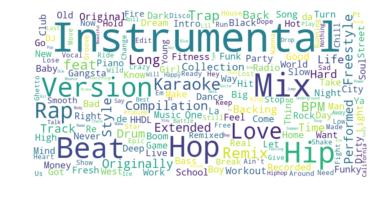

In [194]:
# generate wordcloud
text = ' '.join(tracks_df.name)
stopwords = set(STOPWORDS)

wordcloud =  WordCloud(
    collocations = False,
    width = 800,
    height = 400,
    stopwords=stopwords,
    background_color = 'white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
wordcloud.to_file('cloud1.png')
plt.show()